In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"E:\Dropbox\Projects\rocket_league_analytics\data\xg\combined.csv")
data.head()

,Unnamed: 0,frame,time,goal,is_orange,distanceToGoal,ball_pos_x,ball_pos_y,ball_pos_z,ball_vel_x,...,opp_2_rot_x,opp_2_rot_y,opp_2_rot_z,opp_2_ball_cam,opp_2_boost,opp_2_boost_active,opp_2_jump_active,opp_2_double_jump_active,opp_2_dodge_active,opp_2_boost_collect
0,0,2710,92.0,True,0,966.584399,-1599.369995,4477.009766,110.500000,25402.299805,...,0.903946,0.027020,1.592472,True,66.000000,False,42,4,32,NaN
1,1,3512,112.0,True,0,1470.603582,-1144.359985,3690.520020,135.089996,17386.199951,...,0.016712,0.444989,-0.000108,True,172.986796,True,10,4,8,NaN
2,2,3951,119.0,False,0,3682.619050,527.619995,1743.680054,583.169983,-316.900005,...,-0.280303,1.446455,0.955215,True,129.077247,True,4,False,False,NaN
3,3,5116,161.0,False,1,3767.431118,-2487.120117,3482.280029,95.889999,17407.299805,...,-0.864975,-1.056242,-0.277431,True,125.000000,False,24,False,17,NaN
4,4,5362,170.0,True,0,1666.394692,97.870003,3802.429932,274.940002,-3317.000122,...,-0.396782,-0.285244,-1.058607,True,49.000000,False,6,False,6,NaN


In [3]:
data_filtered = data[[col for col in data.columns if "_pos_" in col] + ['goal']]
data_filtered.head()

,ball_pos_x,ball_pos_y,ball_pos_z,shot_taker_pos_x,shot_taker_pos_y,shot_taker_pos_z,team_mate_pos_x,team_mate_pos_y,team_mate_pos_z,opp_1_pos_x,opp_1_pos_y,opp_1_pos_z,opp_2_pos_x,opp_2_pos_y,opp_2_pos_z,goal
0,-1599.369995,4477.009766,110.500000,-1776.400024,4333.859863,101.389999,-2088.229980,4213.129883,17.059999,227.100006,4748.569824,1633.540039,-1559.589966,5102.939941,294.660004,True
1,-1144.359985,3690.520020,135.089996,-1212.849976,3546.570068,75.029999,-1908.219971,3565.639893,17.010000,-3759.040039,4141.859863,72.940002,-2534.050049,4544.729980,17.030001,True
2,527.619995,1743.680054,583.169983,510.739990,1616.160034,477.170013,-582.590027,3847.530029,16.889999,-227.639999,4759.240234,18.340000,931.090027,1648.930054,308.980011,False
3,-2487.120117,3482.280029,95.889999,-2654.689941,3331.189941,142.470001,-3150.899902,-3912.979980,17.049999,-386.329987,5127.180176,17.059999,-2402.669922,3658.570068,86.550003,False
4,97.870003,3802.429932,274.940002,128.720001,3664.590088,156.929993,-1554.109985,2331.100098,17.049999,-383.559998,5129.009766,41.480000,-488.309998,2681.250000,985.419983,True


In [4]:
data_filtered = data_filtered.dropna()
X = data_filtered.iloc[:, :-1].values
y = data_filtered.iloc[:, -1].astype(int).values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.transform(X_test)

In [7]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(random_state=0)
reg.fit(scaled_X_train, y_train)

LogisticRegression(random_state=0)

In [8]:
y_pred = reg.predict(scaled_X_test)

In [9]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
accuracy_score(y_pred, y_test)

0.6838487972508591

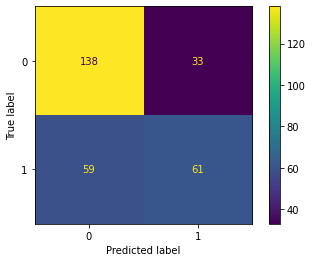

In [10]:
plot_confusion_matrix(reg, scaled_X_test, y_test)

In [11]:
xg_vals = reg.predict_proba(scaled_X_test)[:,1]
xg_vals

array([0.55590675, 0.55752253, 0.28029452, 0.36061183, 0.40070136,
       0.62435067, 0.2648446 , 0.2637137 , 0.13930402, 0.53196753,
       0.39164224, 0.12130678, 0.23203797, 0.21435376, 0.44106343,
       0.62264101, 0.40960282, 0.14825911, 0.40868691, 0.38737886,
       0.52577234, 0.63357477, 0.55010345, 0.51303917, 0.27229953,
       0.38440133, 0.58524342, 0.37883509, 0.62886519, 0.47626953,
       0.50126644, 0.4249684 , 0.15421333, 0.15226221, 0.45727501,
       0.62000445, 0.27020855, 0.36891489, 0.11082105, 0.71273559,
       0.63759389, 0.46474318, 0.76428875, 0.3388988 , 0.22025969,
       0.4912209 , 0.31141705, 0.4157238 , 0.32303399, 0.3397036 ,
       0.54190727, 0.70083459, 0.22723695, 0.10305619, 0.33462356,
       0.58071323, 0.34070061, 0.16470531, 0.34895678, 0.61013578,
       0.06085072, 0.48511227, 0.40672847, 0.63871385, 0.13832341,
       0.58838064, 0.30782211, 0.11096072, 0.35135697, 0.11426074,
       0.66252593, 0.48842126, 0.6027682 , 0.42277589, 0.60495

In [12]:
X_copy = X_test[:, [0,1]]

In [13]:
final_vals = np.c_[X_copy, xg_vals*100]

In [14]:
import matplotlib.pyplot as plt

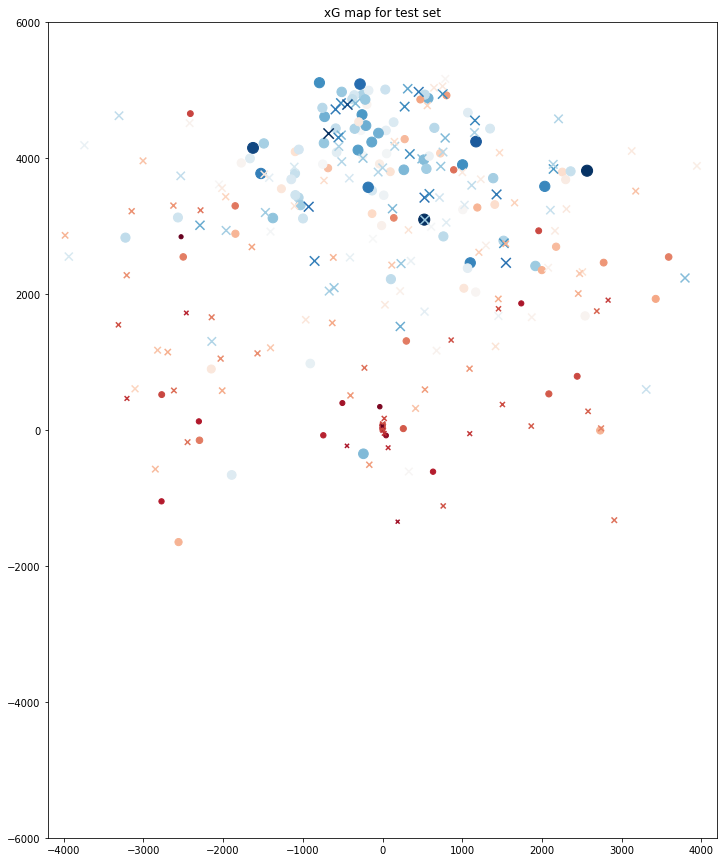

In [15]:
fig = plt.figure(figsize=(12,15))
goals = final_vals[[idx for idx in range(len(y_test)) if y_test[idx] == 1], :]
misses = final_vals[[idx for idx in range(len(y_test)) if y_test[idx] == 0], :]
plt.scatter(goals[:,0], goals[:,1], s=goals[:,2]*1.5, alpha=1, cmap="RdBu", c=goals[:,2], marker='o')
plt.scatter(misses[:,0], misses[:,1], s=misses[:,2]*1.5, alpha=1, cmap="RdBu", c=misses[:,2], marker='x')
# c=["red" if x<50 else "blue" for x in final_vals[:,2]],
plt.ylim([-6000, 6000])
plt.xlim([-4200, 4200])
plt.title("xG map for test set")
plt.show()